In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
AA = np.array([])
BB = np.array([])
CC = np.array([])
DD = np.array([])

for instance_id in range(20):
	file1_num_epoch = f"maQAOA/{instance_id}/num_epoch.csv"
	file2_num_epoch = f"maQAOA_reset_momentum/{instance_id}/num_epoch.csv"
	file3_num_epoch = f"maQAOA_group_param/{instance_id}/num_epoch.csv"
	file4_num_epoch = f"maQAOA_group_param_and_reset_momentum/{instance_id}/num_epoch.csv"	

	A = pd.read_csv(file1_num_epoch, header=None)
	A = np.array(A[0])
	B = pd.read_csv(file2_num_epoch, header=None)
	B = np.array(B[0])
	C = pd.read_csv(file3_num_epoch, header=None)
	C = np.array(C[0])
	D = pd.read_csv(file4_num_epoch, header=None)
	D = np.array(D[0])

	AA = np.concat((AA,A))
	BB = np.concat((BB,B))
	CC = np.concat((CC,C))
	DD = np.concat((DD,D))

	assert len(A)==100
	assert len(B)==100
	assert len(C)==100
	assert len(D)==100
	"""
	print(f"mean number of epoch of original                  of instance {instance_id}: {A.mean()}")
	print(f"mean number of epoch of momentum reset            of instance {instance_id}: {B.mean()}")
	print(f"mean number of epoch of staged                    of instance {instance_id}: {C.mean()}")
	print(f"mean number of epoch of staged and momentum reset of instance {instance_id}: {D.mean()}")
	"""


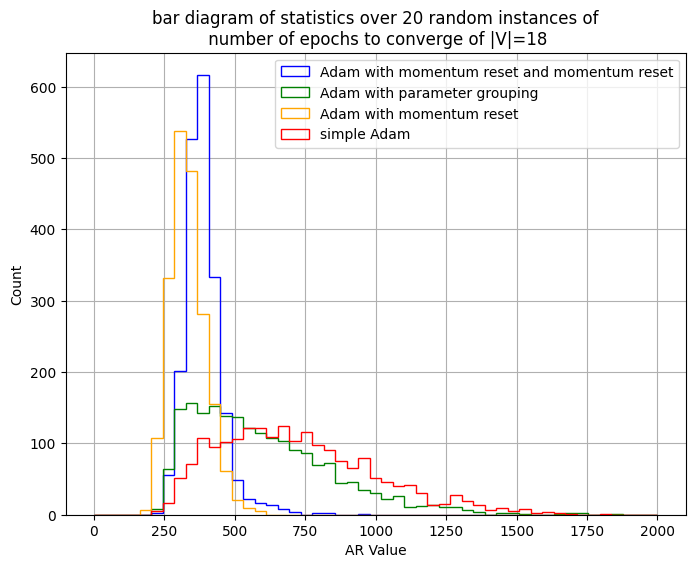

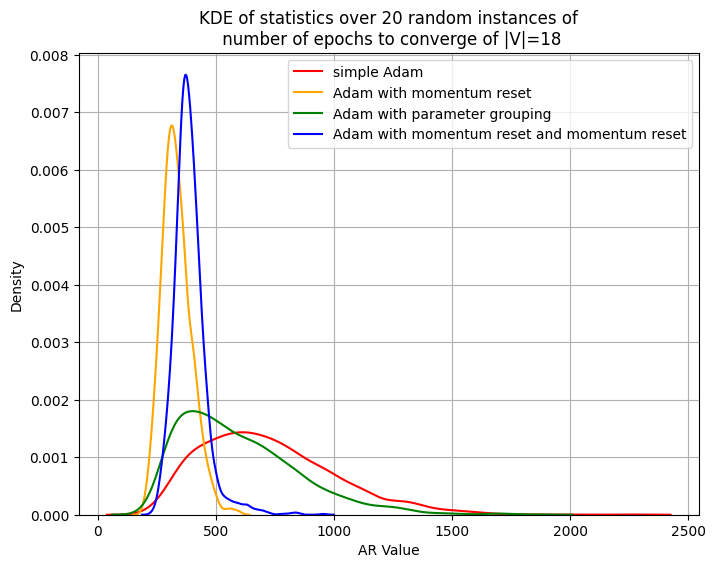

mean AR of original                  of instance 19: 721.0615
mean AR of momentum reset            of instance 19: 334.479
mean AR of staged                    of instance 19: 597.096
mean AR of staged and momentum reset of instance 19: 389.199


In [3]:
bins = np.linspace(0, 2000, 50)
bin_width = bins[1] - bins[0]
plt.figure(figsize=(8, 6))
plt.hist([AA, BB, CC, DD], bins=bins
		, label=['simple Adam', 'Adam with momentum reset', 'Adam with parameter grouping', 'Adam with momentum reset and momentum reset']
		, color=['red', 'orange', 'green', 'blue']
		,histtype="step")
plt.xlabel('AR Value')
plt.ylabel('Count')
plt.title(f'bar diagram of statistics over 20 random instances of\n number of epochs to converge of |V|=18')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(AA, label="simple Adam", color="red")
sns.kdeplot(BB, label="Adam with momentum reset", color="orange")
sns.kdeplot(CC, label="Adam with parameter grouping", color="green")
sns.kdeplot(DD, label="Adam with momentum reset and momentum reset", color="blue")
plt.title(f'KDE of statistics over 20 random instances of\n number of epochs to converge of |V|=18')
plt.xlabel("AR Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

print(f"mean AR of original                  of instance {instance_id}: {AA.mean()}")
print(f"mean AR of momentum reset            of instance {instance_id}: {BB.mean()}")
print(f"mean AR of staged                    of instance {instance_id}: {CC.mean()}")
print(f"mean AR of staged and momentum reset of instance {instance_id}: {DD.mean()}")

In [4]:
print(f"mean number of epoch of original                  : {AA.mean()}")
print(f"mean number of epoch of momentum reset            : {BB.mean()}")
print(f"mean number of epoch of staged                    : {CC.mean()}")
print(f"mean number of epoch of staged and momentum reset : {DD.mean()}")

mean number of epoch of original                  : 721.0615
mean number of epoch of momentum reset            : 334.479
mean number of epoch of staged                    : 597.096
mean number of epoch of staged and momentum reset : 389.199
